In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.chdir('02514-Deep-Learning-In-Computer-Vision/segmentation')
import numpy as np

# pip install torchsummary
import torch
from torch.utils.data import DataLoader
from dataloader import Lesion_Data, DRIVE_data
import matplotlib.pyplot as plt


print("Running on ", torch.device("cuda" if torch.cuda.is_available() else "cpu"))

Running on  cuda


In [2]:
size = 128
batch_size = 6

dataset = Lesion_Data(train_transform_size=size, test_transform_size=size)
trainset, testset, validationset = dataset.get_datasets()

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=3)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=3)
validation_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=3)

In [3]:
print('Loaded %d training images' % len(trainset))
print('Loaded %d test images' % len(testset))
print('Loaded %d validation images' % len(validationset))

Loaded 128 training images
Loaded 40 test images
Loaded 32 validation images


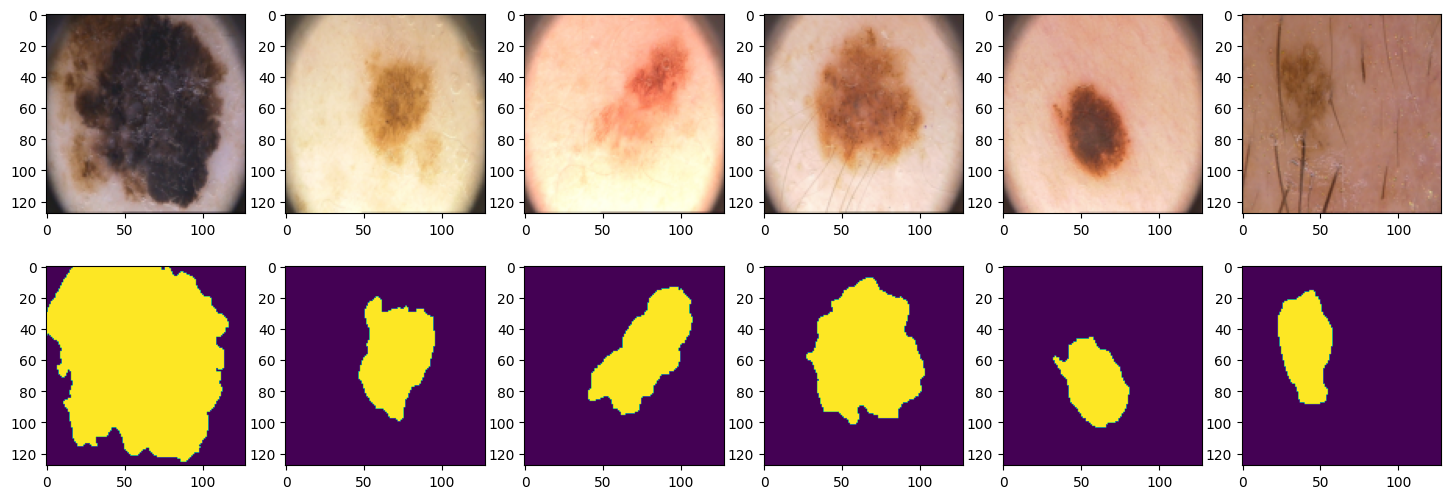

In [5]:
plt.rcParams['figure.figsize'] = [18, 6]

images, labels = next(iter(train_loader))

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.imshow(np.swapaxes(np.swapaxes(images[i], 0, 2), 0, 1))

    plt.subplot(2, 6, i+7)
    plt.imshow(labels[i].squeeze())
plt.show()

In [4]:

size = 128
batch_size = 6

dataset = DRIVE_data(train_transform_size=size, test_transform_size=size)
trainset, testset, validationset = dataset.get_datasets()

train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=3)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=3)
validation_loader = DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=3)

In [5]:
print('Loaded %d training images' % len(trainset))
print('Loaded %d test images' % len(testset))
print('Loaded %d validation images' % len(validationset))

Loaded 13 training images
Loaded 4 test images
Loaded 3 validation images


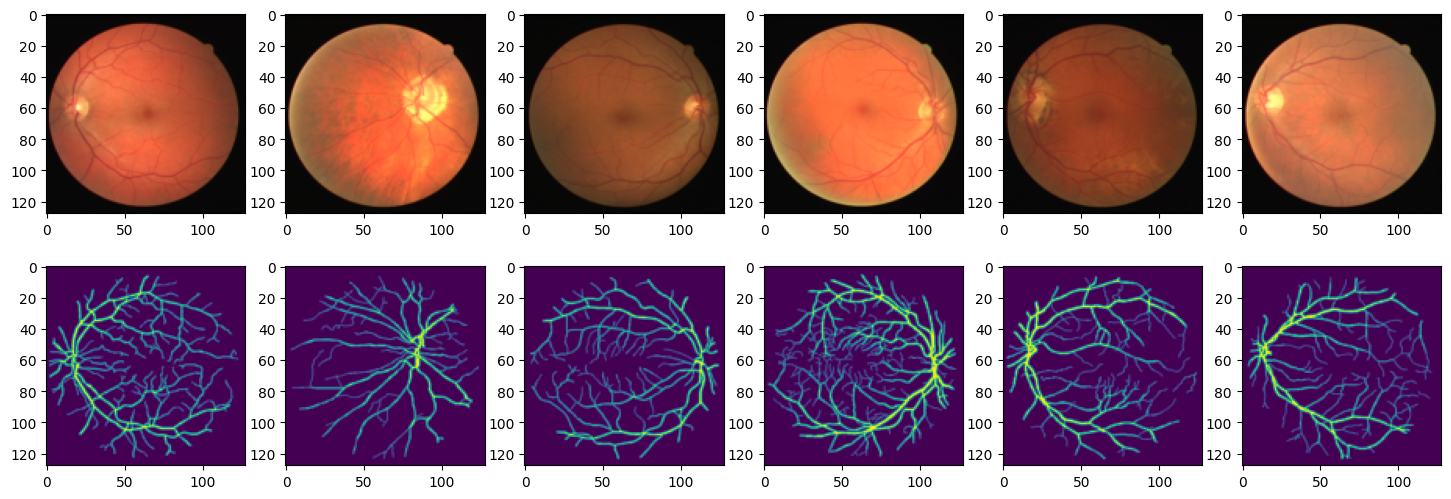

In [6]:
plt.rcParams['figure.figsize'] = [18, 6]

images, labels = next(iter(train_loader))

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.imshow(np.swapaxes(np.swapaxes(images[i], 0, 2), 0, 1))

    plt.subplot(2, 6, i+7)
    plt.imshow(labels[i].squeeze())
plt.show()

In [6]:
from segmentator import Segmentator
import wandb

Using device: cuda
Loading dataset: Lesion
Loaded 128 training images
Loaded 40 test images
Loaded 32 validation images


* Epoch 1/10
Validation loss: 0.7074043949445089
* Epoch 2/10
Validation loss: 0.6606645882129669
* Epoch 3/10
Validation loss: 0.6209125916163126
* Epoch 4/10
Validation loss: 0.6750004986921946
* Epoch 5/10
Validation loss: 0.672706812620163
* Epoch 6/10
Validation loss: 0.6147619386514028
* Epoch 7/10
Validation loss: 0.6158756415049235
* Epoch 8/10
Validation loss: 0.7375621795654297
* Epoch 9/10
Validation loss: 0.6350363890329996
* Epoch 10/10
Validation loss: 0.6433302859465281


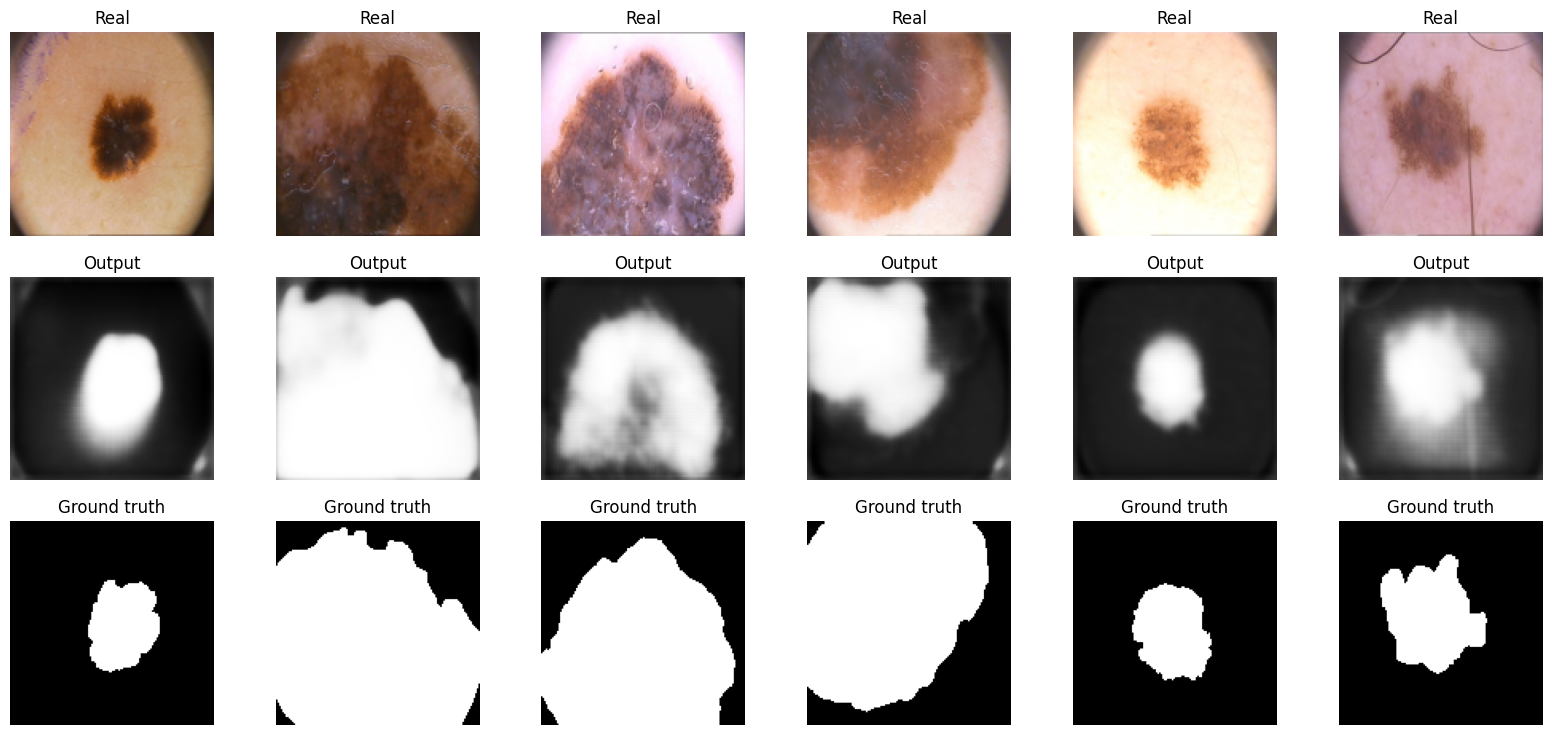

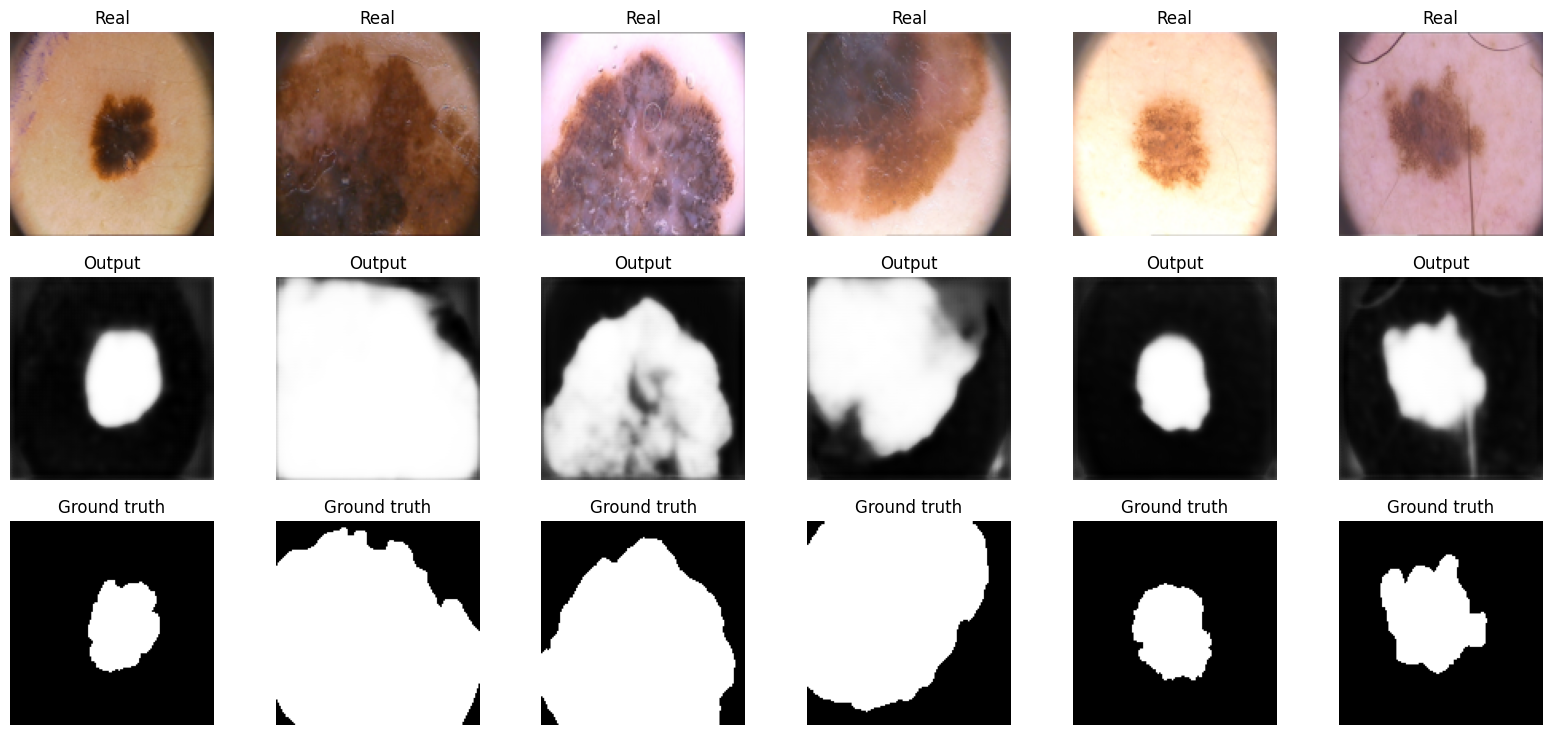

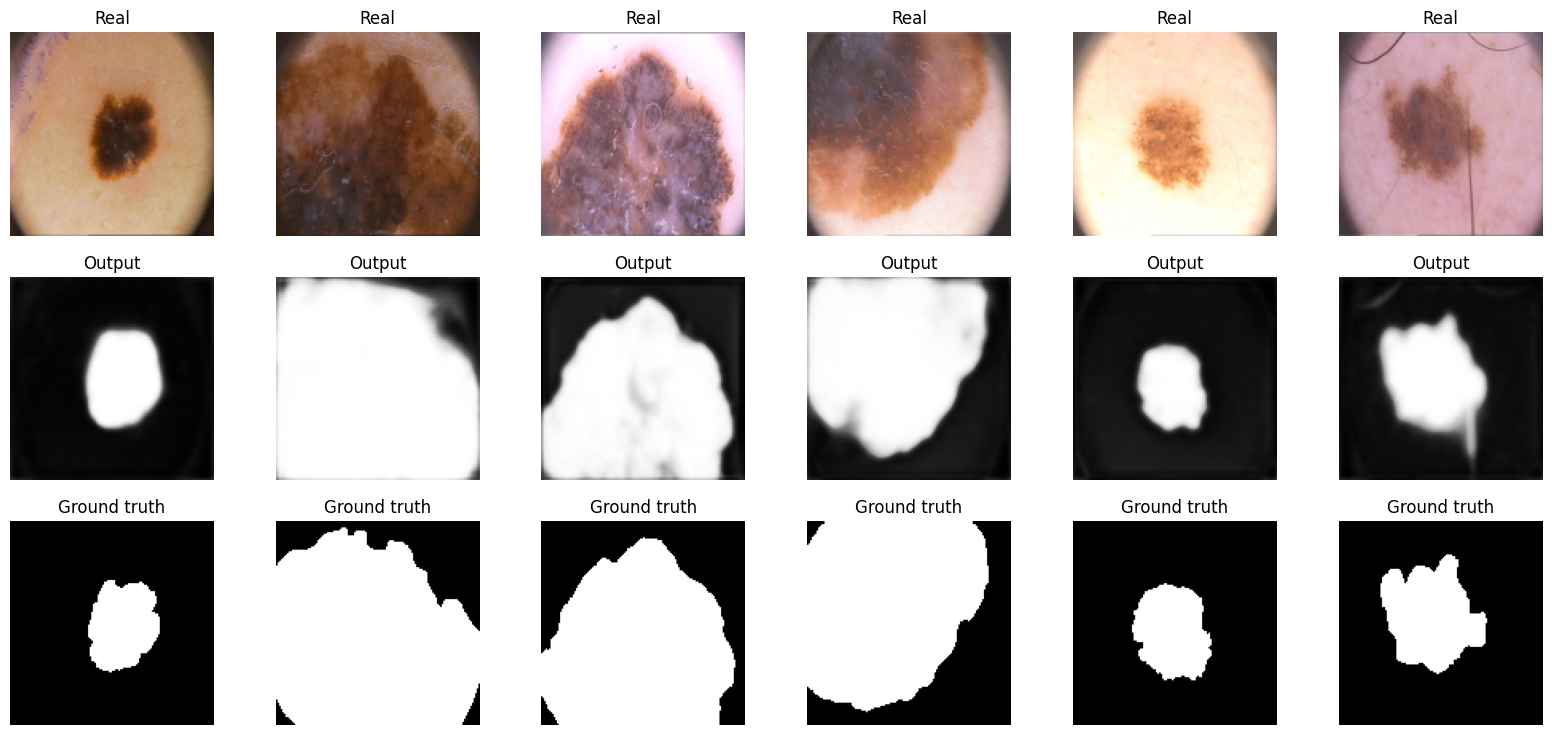

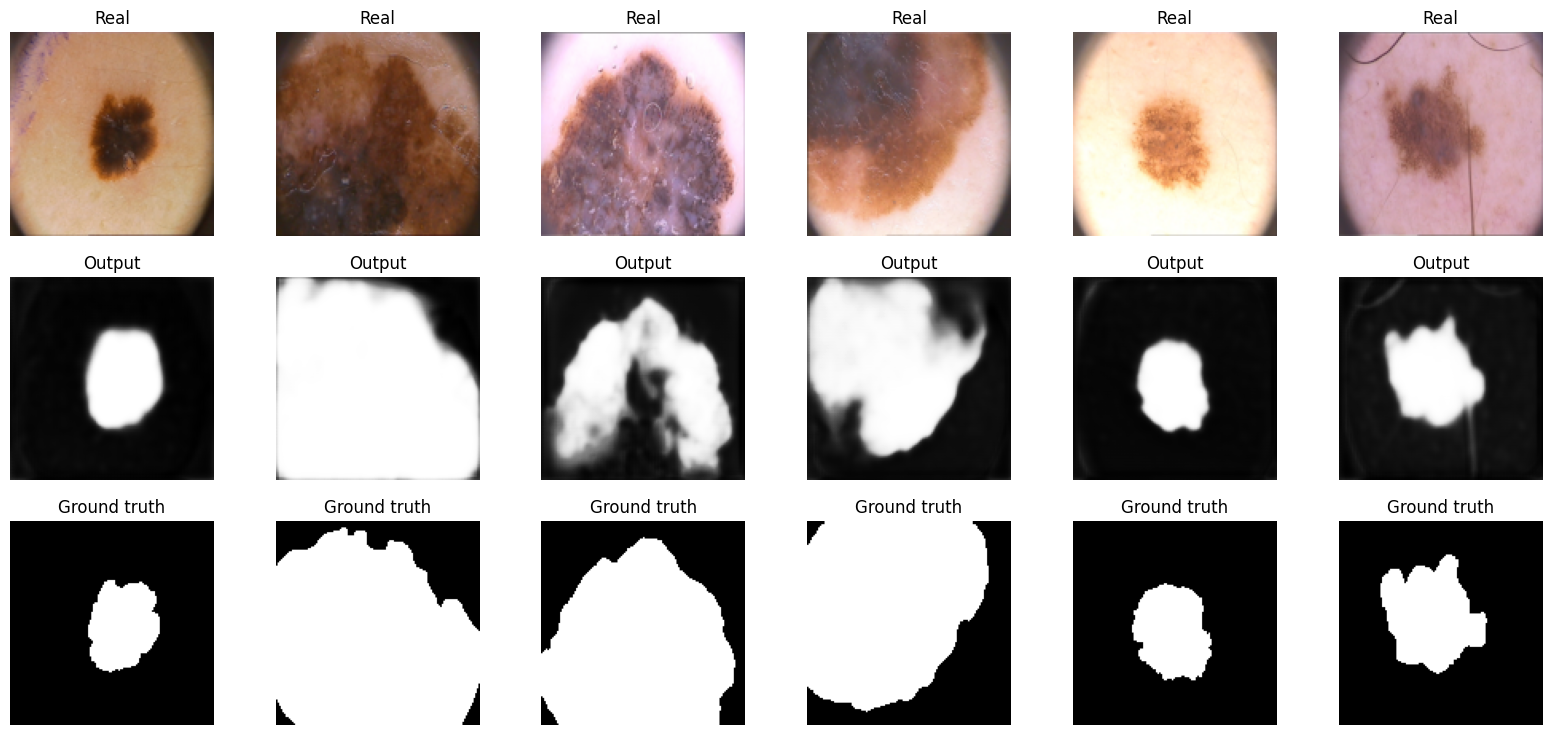

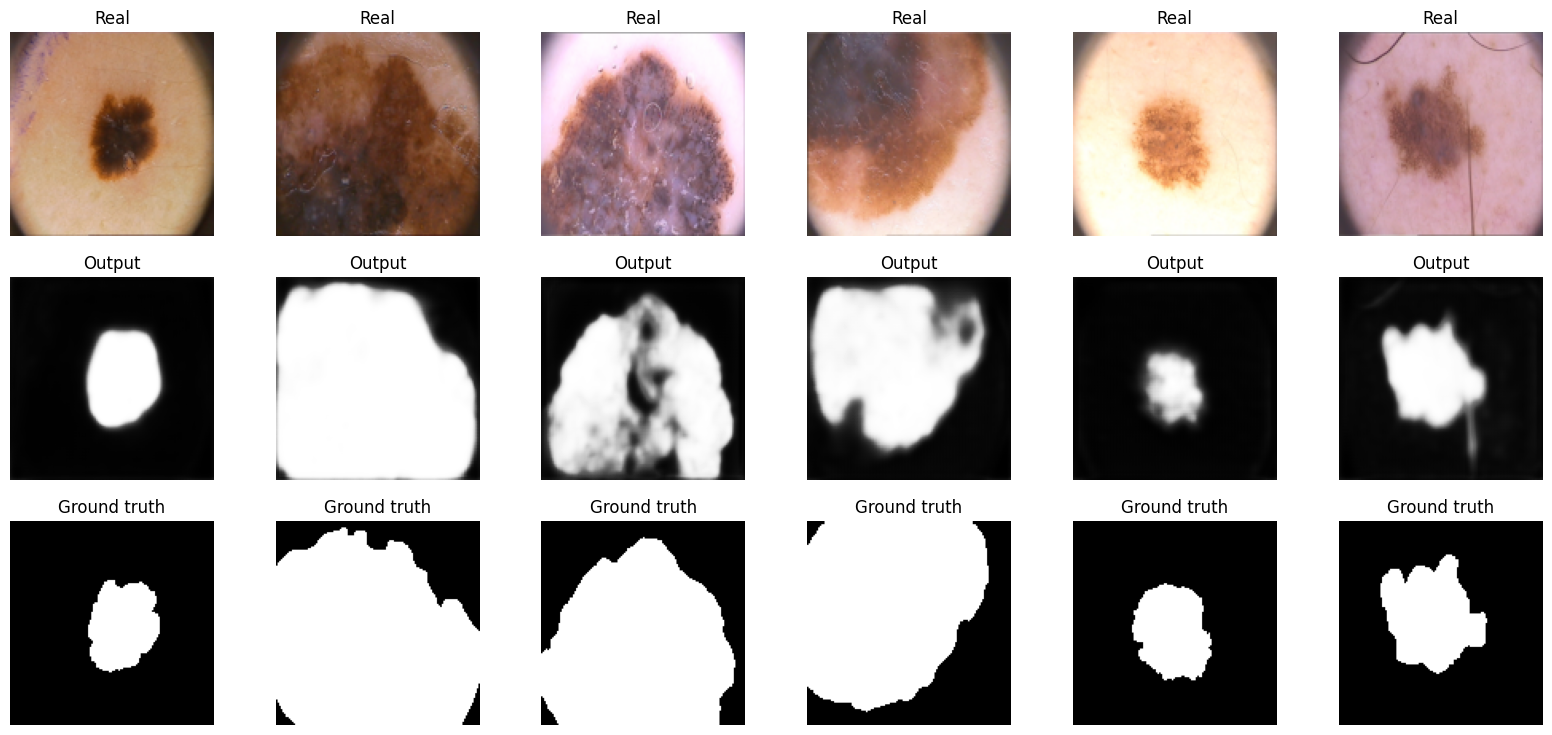

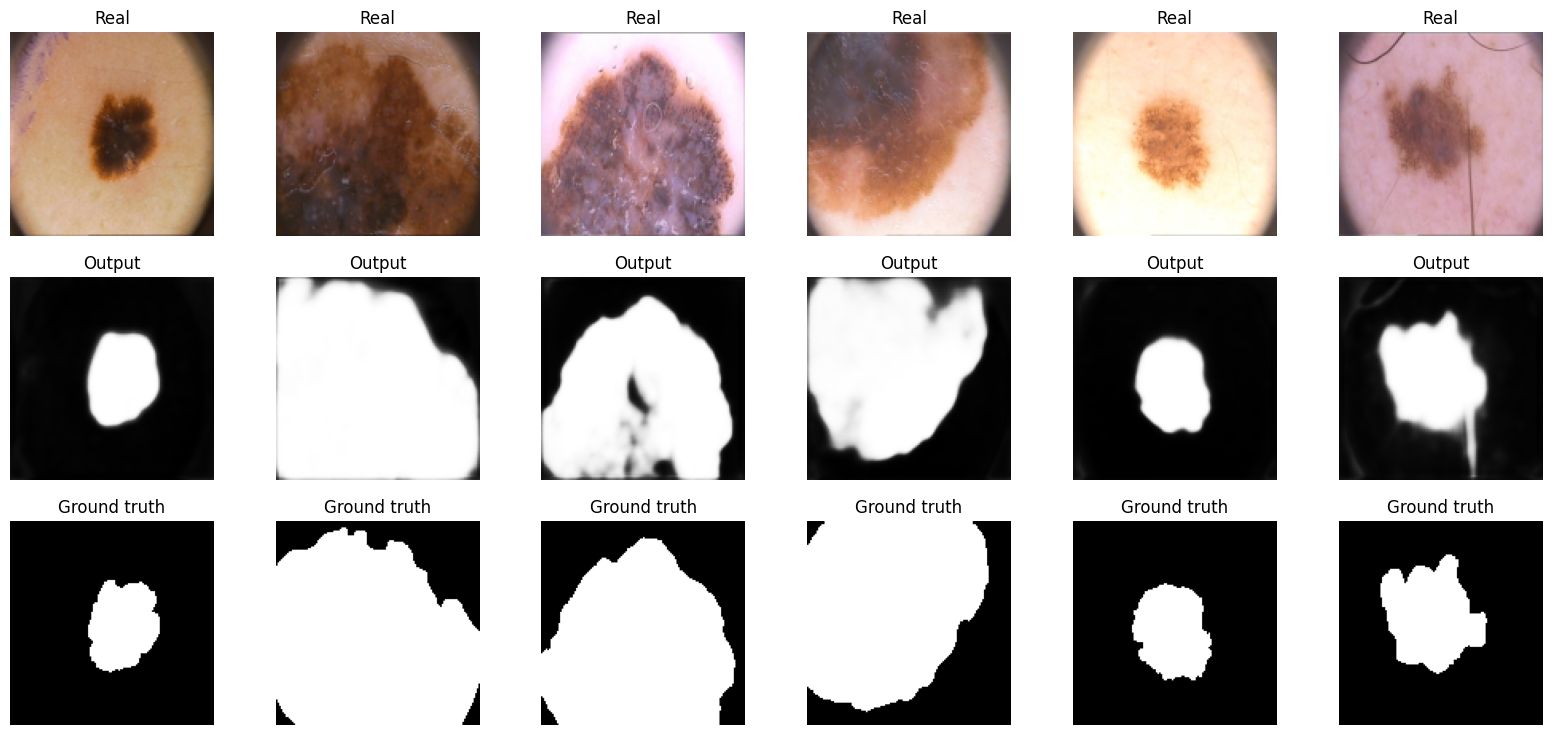

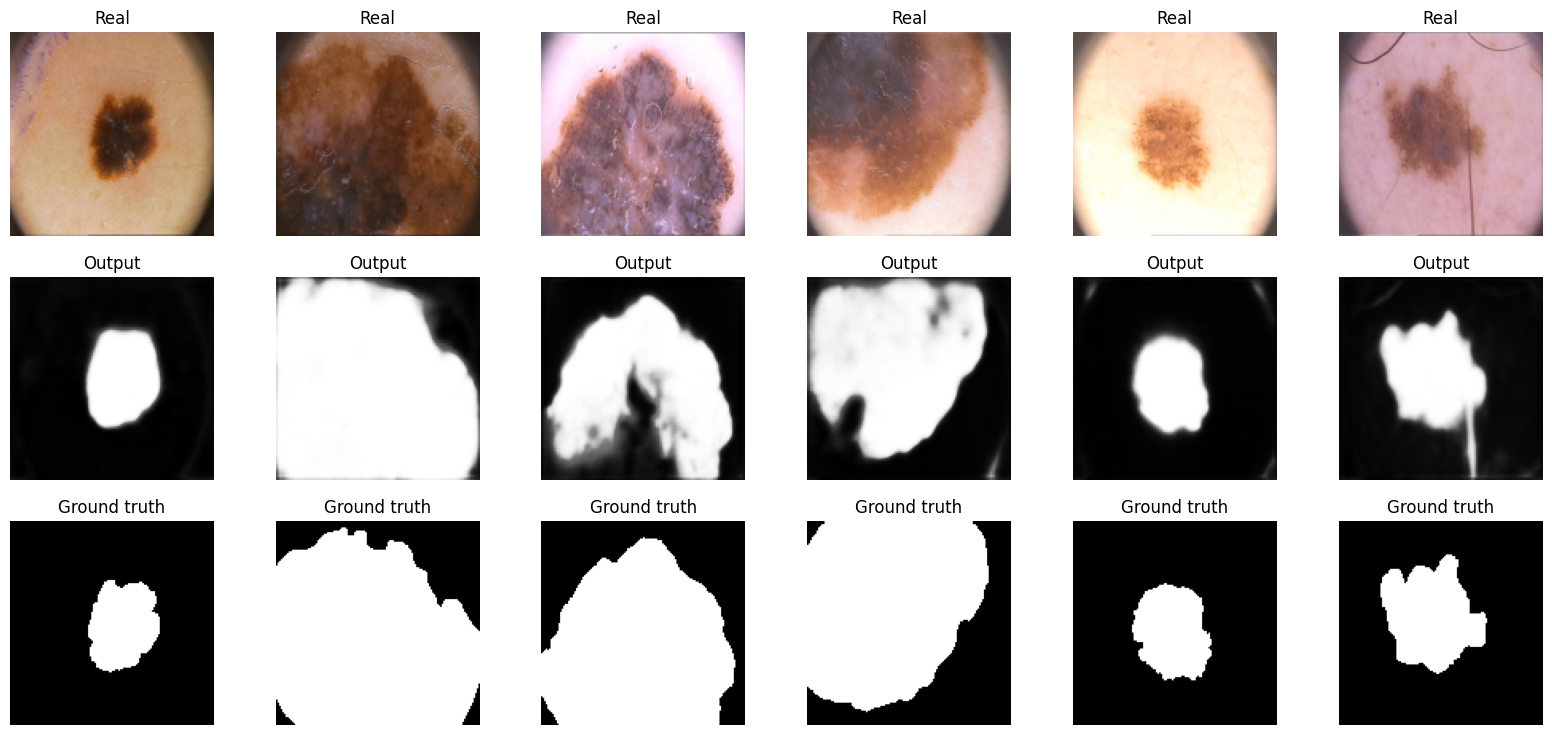

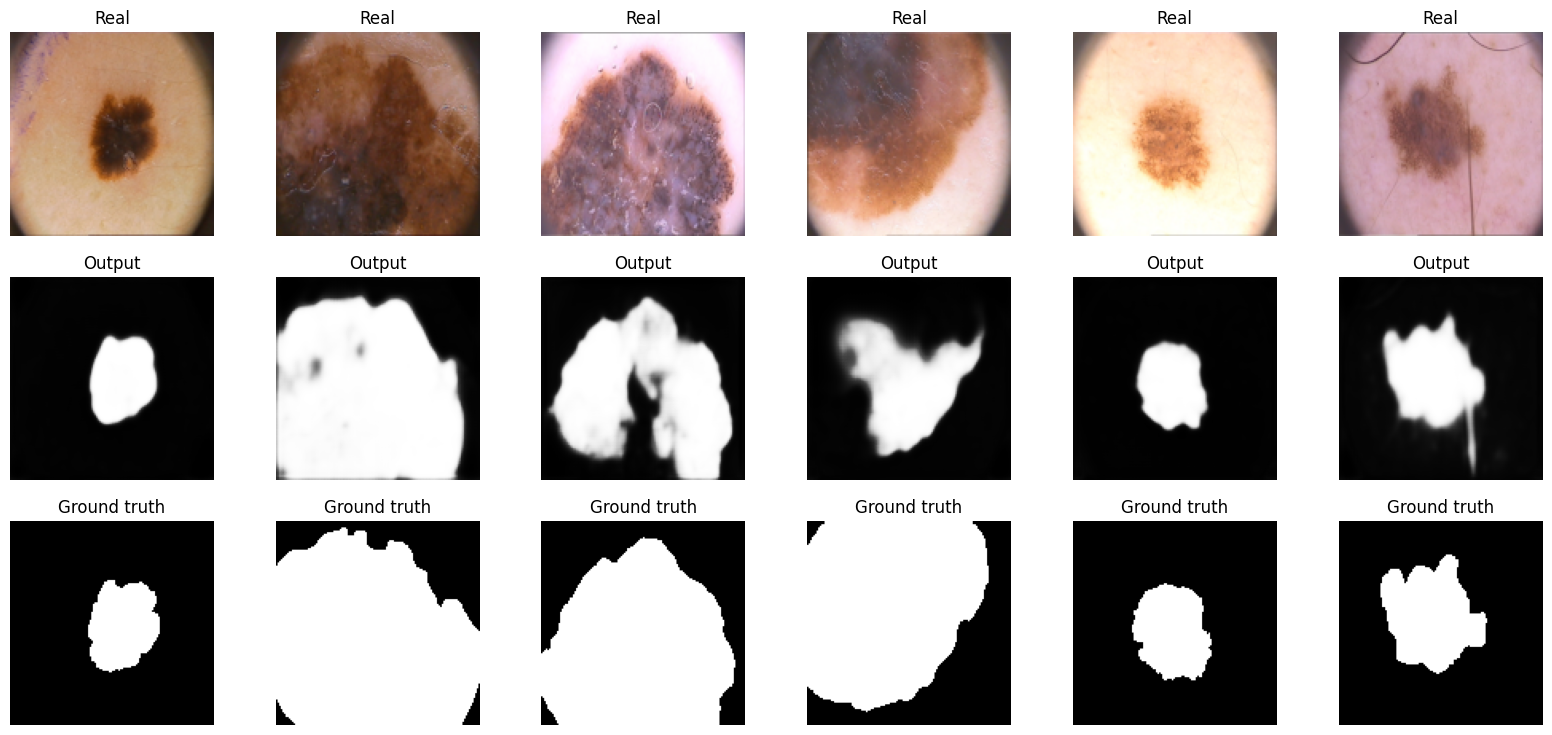

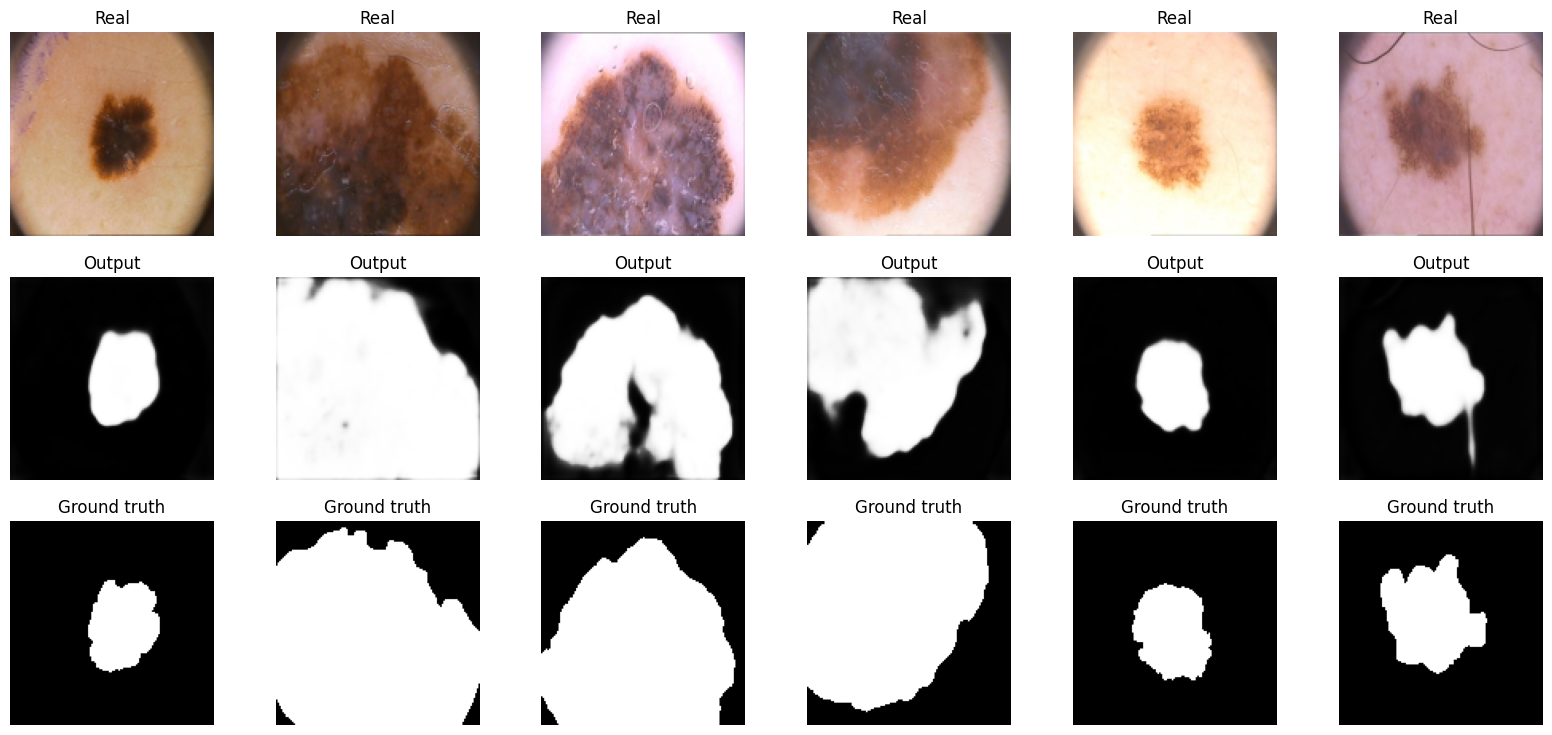

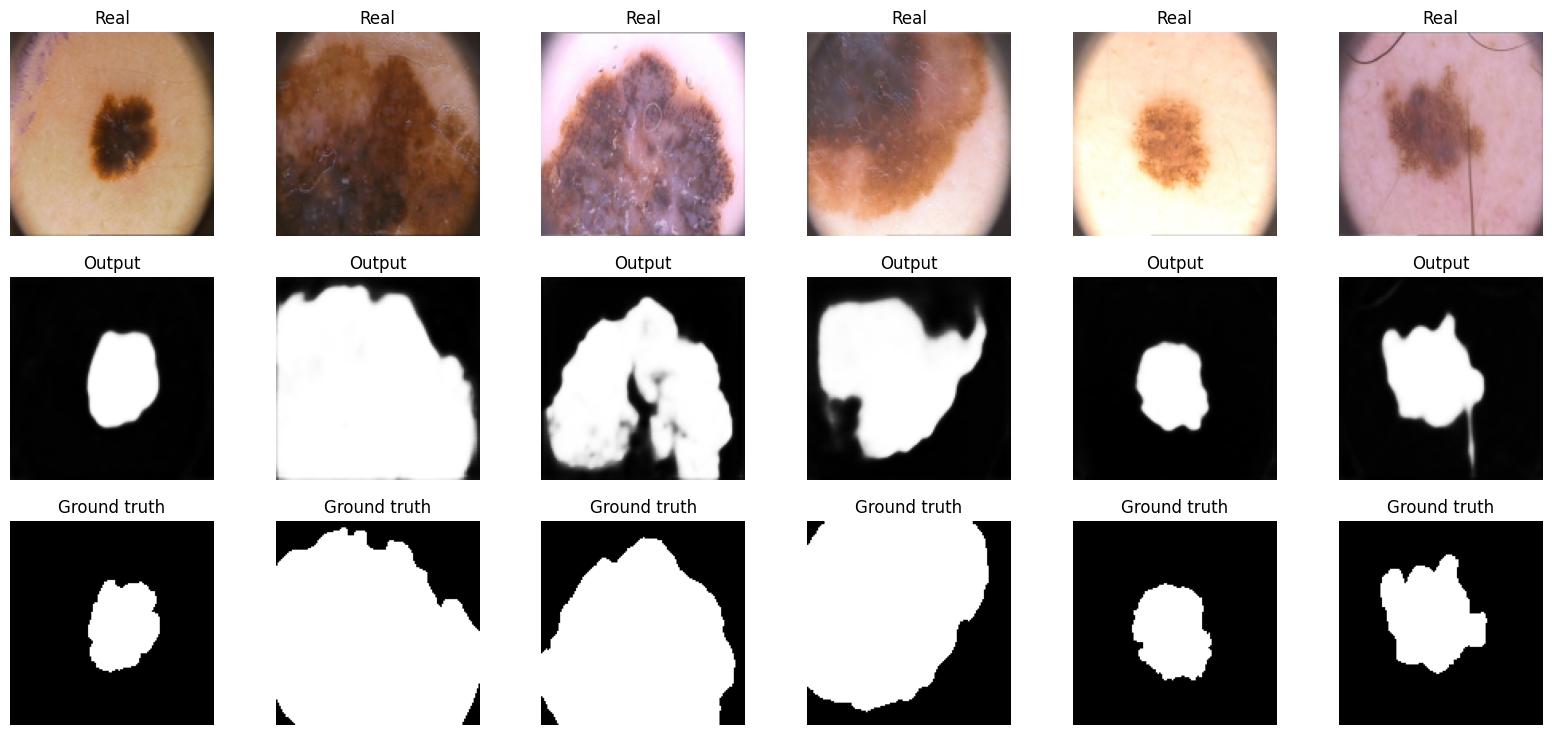

In [8]:

wandb.finish()
model = Segmentator(model="EncDec", use_wandb=True)
model.train()